In [5]:
# Import beberapa library yang diperlukan

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# LEMBAR KERJA 1

In [20]:
df = pd.read_excel("Data 1.xlsx")         # Membuka data dari StatStar dalam python
data = df[::-1].reset_index(drop = True)  # Mengurutkan data dari lapisan permukaan ke inti bintang

## Nomor 1

In [8]:
def tau(k1, rho1, k2, rho2, r1, r2):         # Mendefinisikan persamaan pada soal 1.b
  return (((k1*rho1)+(k2*rho2))/2)*(r2-r1)

In [9]:
r_arr = data["r"]          # Mengubah kolom r menjadi array
rho_arr = data["rho"]      # Mengubah kolom rho menjadi array
kap_arr = data["kap"]      # Mengubah kolom kappa menjadi array

op_arr = []                # Inisiasi array opasitas
op_1 = 0                   # Inisiasi awal opasitas pada lapisan pertama 

for i in range (0, 30):
    op_arr.append(op_1)
    op_2 = op_1 - tau(kap_arr[i],rho_arr[i],kap_arr[i+1],rho_arr[i+1],r_arr[i],r_arr[i+1])
    op_1 = op_2

## Nomor 2

In [10]:
def T(tau):                 # Mendefinisikan persamaan pada soal 2
    Tef = 5500.2
    return ((3/4)*(Tef**4)*(tau+(2/3)))**0.25

In [11]:
T_arr = []                  # Inisiasi array temperatur hasil perhitungan
for i in range (0, 30):
    suhu=T(op_arr[i])
    T_arr.append(suhu)

Tstat_arr = data.loc[0:29 ,"T"]  # Mengambil data temperatur dari statstar 30 lapisan teratas dari permukaan (i = 1 sampai i = 30)

In [13]:
# Membuat tabel menyesuaikan data yang diperlukan pada soal 2

import dataframe_image as dfi    # Mengimpor modul dataframe_image untuk mendownload tabel dalam format .png

lap = []                         # Inisiasi array untuk membuat kolom lapisan
for i in range(0, 30):
    lap.append(i+1)

table1 = pd.DataFrame({'i':lap,                                   # Membuat tabel sesuai dengan soal 2
                        'r (cm)':data.loc[0:29 ,"r"],
                        'rho (g cm-3)':data.loc[0:29 ,"rho"],
                        'kappa (cm2 g-1)':data.loc[0:29 ,"kap"],
                        'tau':op_arr,
                        'T_StatStar (K)':Tstat_arr,
                        'T_perhitungan (K)':T_arr})

#table1
dfi.export(table1, 'table1.png') # Mengunduh tabel ke dalam format .png

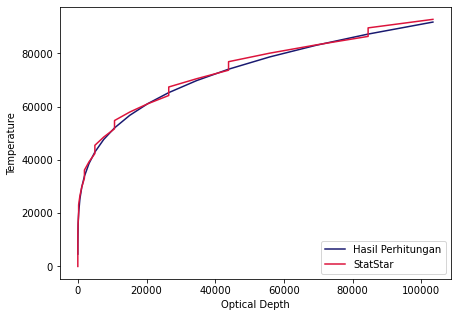

In [17]:
# Membuat plot temperatur hasil perhitungan dengan temperatur yang diperoleh dari statstar

plt.figure(figsize=(7,5))
plt.plot(op_arr, T_arr, label="Hasil Perhitungan", c="midnightblue")
plt.plot(op_arr, Tstat_arr, label="StatStar", c="crimson")
plt.xlabel("Optical Depth")
plt.ylabel("Temperature")
plt.legend(loc='lower right')
plt.show()

## Nomor 4 

In [87]:
def M(Q, Mtot):
    return (1 - Q)*Mtot

In [88]:
Qm_arr = data["Qm"]
Mtot = 1
Mr_arr = []

for i in range (0,424):
    Mr_arr.append(M(Qm_arr[i],Mtot))

Mr = pd.DataFrame(Mr_arr, columns=['M_r'])
data1 = pd.merge(data, Mr, left_index=True, right_index=True)


In [89]:
data1.loc[401:402]

,r,Qm,L_r,T,P,rho,kap,eps,dlPdlT,zone,M_r
401,17000000000,0.563,3.210000e+33,8170000,2.810000e+16,25.7,2.99,0.42,3.7,r,0.437
402,16300000000,0.597,3.170000e+33,8460000,3.200000e+16,28.2,2.88,0.55,3.6,r,0.403


# LEMBAR KERJA 2

## Nomor 1 

In [90]:
data1

,r,Qm,L_r,T,P,rho,kap,eps,dlPdlT,zone,M_r
0,71100000000,0.000000e+00,3.290000e+33,0,0.000000e+00,0.000000e+00,0.00,0,4.3,r,1.000
1,71000000000,3.940000e-14,3.290000e+33,3290,7.970000e+00,1.750000e-11,230.00,1.67-102,4.3,r,1.000
2,70900000000,6.080000e-13,3.290000e+33,6580,2.260000e+02,2.520000e-10,172.00,0.0,4.8,r,1.000
3,70800000000,3.400000e-12,3.290000e+33,9880,1.660000e+03,1.240000e-09,148.00,0.0,4.9,r,1.000
4,70800000000,1.180000e-11,3.290000e+33,13200,6.640000e+03,3.720000e-09,130.00,0.0,4.8,r,1.000
...,...,...,...,...,...,...,...,...,...,...,...
419,4190000000,9.880000e-01,5.510000e+32,13500000,1.320000e+17,7.310000e+01,1.49,12.1,2.5,c,0.012
420,3480000000,9.930000e-01,4.280000e+32,13700000,1.360000e+17,7.450000e+01,1.46,13.1,2.5,c,0.007
421,2770000000,9.970000e-01,3.400000e+32,13800000,1.400000e+17,7.570000e+01,1.44,13.9,2.5,c,0.003
422,2060000000,9.990000e-01,2.830000e+32,13900000,1.430000e+17,7.660000e+01,1.42,14.6,2.5,c,0.001


In [91]:
L_arr = data1["L_r"]
T_arr = data1["T"]
P_arr = data1["P"]

Lr_L = []
Tr_T = []
Pr_P = []
Mr_M = []
r_rs = []

for i in range (len(data1)):
    r_rs.append(r_arr[i]/r_arr[1])
    Lr_L.append(L_arr[i]/L_arr[1])
    Tr_T.append(T_arr[i]/T_arr[len(data1)-1])
    Pr_P.append(P_arr[i]/P_arr[len(data1)-1])
    Mr_M.append(Mr_arr[i]/Mr_arr[1])

    

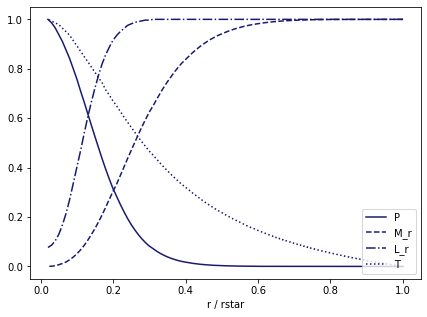

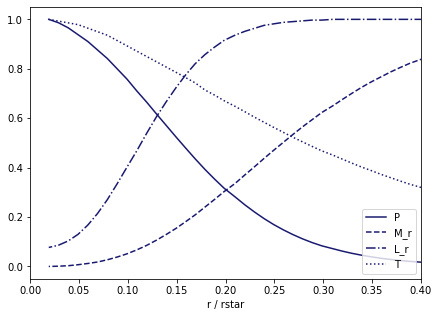

In [92]:
plt.figure(figsize=(7,5))
plt.plot(r_rs, Pr_P, label="P", c="midnightblue")
plt.plot(r_rs, Mr_M, label="M_r", ls='--', c="midnightblue")
plt.plot(r_rs, Lr_L, label="L_r", ls='dashdot', c="midnightblue")
plt.plot(r_rs, Tr_T, label="T", ls='dotted', c="midnightblue")
plt.xlabel("r / rstar")
plt.legend(loc='lower right')
#plt.xlim(0,1, 0.01)
plt.show()

print()

plt.figure(figsize=(7,5))
plt.plot(r_rs, Pr_P, label="P", c="midnightblue")
plt.plot(r_rs, Mr_M, label="M_r", ls='--', c="midnightblue")
plt.plot(r_rs, Lr_L, label="L_r", ls='dashdot', c="midnightblue")
plt.plot(r_rs, Tr_T, label="T", ls='dotted', c="midnightblue")
plt.xlabel("r / rstar")
plt.legend(loc='lower right')
plt.xlim(0,0.4)
plt.show()

## Nomor 2 

In [93]:
df1 = pd.read_excel("Data2.xlsx")
df2 = pd.read_excel("Data3.xlsx")
df3 = pd.read_excel("Data4.xlsx")
df4 = pd.read_excel("Data5.xlsx")
df5 = pd.read_excel("Data6.xlsx")
df6 = pd.read_excel("Data7.xlsx")
df7 = pd.read_excel("Data8.xlsx")

In [94]:
array = [df1, df2, df3, df4, df5, df6, df7]
M_star = [0.75, 1.00, 1.50, 3.00, 5.00, 8.00, 10.00]
T_c = []
rho_c = []
eps_c = []

for i in range (len(array)):
    a = array[i]
    T_c.append(a["T"].iloc[0]/(10**7))
    rho_c.append(a["rho"].iloc[0]/10)
    eps_c.append(math.log(a["eps"].iloc[0], 10))


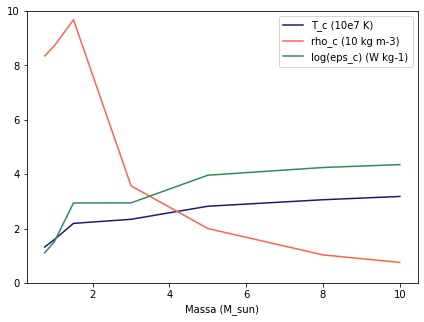

In [95]:
plt.figure(figsize=(7,5))
plt.plot(M_star, T_c, label="T_c (10e7 K)", c="midnightblue")
plt.plot(M_star, rho_c, label="rho_c (10 kg m-3)", c="tomato")
plt.plot(M_star, eps_c, label="log(eps_c) (W kg-1)", c="seagreen")
plt.xlabel("Massa (M_sun)")
plt.legend(loc='upper right')
plt.ylim(0, 10)
plt.show()

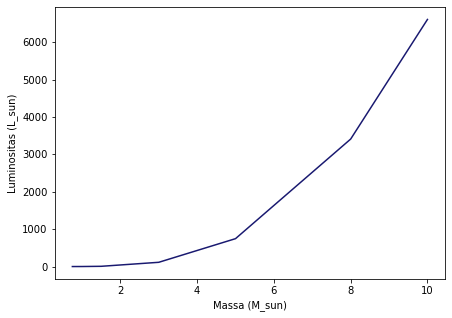

In [96]:
L_star = [0.189, 0.859, 6.408, 113.5, 745.7, 3409.0, 6607.0]

plt.figure(figsize=(7,5))
plt.plot(M_star, L_star, c="midnightblue")
plt.xlabel("Massa (M_sun)")
plt.ylabel("Luminositas (L_sun)")
plt.show()
print()

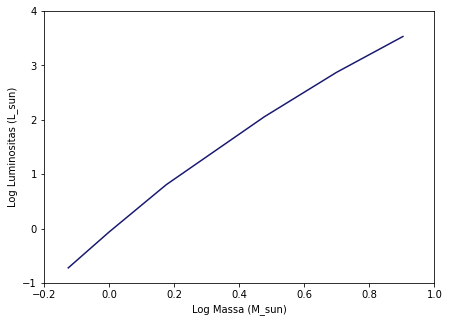

In [97]:
M_log = []
L_log = []

for i in range (0, 6):
    M_log.append(math.log(M_star[i], 10))
    L_log.append(math.log(L_star[i], 10))
       
plt.figure(figsize=(7,5))
plt.plot(M_log, L_log, c="midnightblue")
plt.xlabel("Log Massa (M_sun)")
plt.ylabel("Log Luminositas (L_sun)")
plt.xlim(-0.2, 1)
plt.ylim(-1, 4)
plt.show()

## Nomor 3 

In [100]:
L_1 = [0.189, 0.859, 6.408, 113.5, 745.7, 3409.0, 6607.0]
L_2 = [0.161, 0.760, 5.62, 104.7, 710.0, 3317.0, 6475.0]
T_1 = [3788.5, 5402.0, 8644.6, 14671.0, 20069.0, 25366.5, 27933.0]
T_2 = [3583.5, 5196.3, 8219.0, 14146.5, 19556.8, 24819.5, 27439.0]

L1_log = []
L2_log = []
T1_log = []
T2_log = []

for i in range (0, 6):
    L1_log.append(math.log(L_1[i], 10))
    L2_log.append(math.log(L_2[i], 10))
    T1_log.append(math.log(T_1[i], 10))
    T2_log.append(math.log(T_2[i], 10))

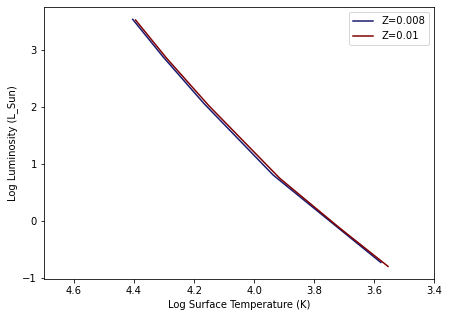

In [101]:
plt.figure(figsize=(7,5))
plt.plot(T1_log, L1_log, label="Z=0.008", c="midnightblue")
plt.plot(T2_log, L2_log, label="Z=0.01", c="maroon")
plt.xlabel("Log Surface Temperature (K)")
plt.ylabel("Log Luminosity (L_Sun)")
plt.legend(loc='upper right')
plt.xlim(4.7, 3.4)
plt.show()